In [1]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import pandas as pd
import re
import numpy as np 
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from deap import algorithms, base, creator, tools
from nltk import word_tokenize
import re, string
import random
import statistics 
from statistics import mean
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/spetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:

dict_freq = {}  # frequency map for words in list
dict_paired_freq = {}

path = '/home/spetz/Downloads/DeliciousMIL/Data/train-data.dat'
clean_files = []
df = pd.DataFrame()

file = open(path).readlines()
len(file)

#clear data
clear_file=[]
for i in range(len(file)):
    x=re.sub('<.*?>','',file[i])
    clear_file.append(x)

clear_file=clear_file[:1000]

#perasma tou clear keimenou sto words string
words = ''
for line in clear_file:
    words += line


tokenized_words = word_tokenize(words) # list of all words in new dictionary
WORD_LIST = list(set(tokenized_words)) # create a set out of words so there are no repeats in word list and make list again
dictionary_size = len(WORD_LIST) #6853


#Dhmiourgia dictionary lekseis kai suxnotitas emfanisi tis lekseis se olo to keimeno
for word in tokenized_words: #gia kathe word sto lista leksewn olou tou keimenou
    if word not in dict_freq: 
        dict_freq[word] = 1
    else:
        dict_freq[word] += 1


In [3]:
#TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tf=computeTF(dict_freq,tokenized_words)

#IDF: log((Total number of sentences (documents))/(Number of sentences (documents) containing the word))
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(dict_freq,0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return idfDict

idf=computeIDF(dict_freq)
len(idf)


6853

In [4]:

#FINAL TF-IDF
def computeDFIDF(tfbow,idfs):
    tfidf={}
    for word,val in tfbow.items():
        tfidf[word] = val*idfs[word]

    return tfidf

In [54]:
#final TF-IDF
Tf_idf=computeDFIDF(tf,idf)
#Apothikeusi mono ton timwn
new_list = list(Tf_idf.values())
len(new_list)
tf_idf_Xtrain = np.asarray(new_list)



In [66]:

#Create a FitnessMax class 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#Create an Individual class 
creator.create("Individual", list, fitness=creator.FitnessMax)

def getFitness(individual):
    counter = 0
    fitness = 0

    #gia kathe thesi sto indi
    for word_index in individual:
        #vale sto string thn antistoixi leksi
        if new_list[word_index] <= 1:
            fitness += new_list[word_index]
        
        else:
            fitness -=20
    
    return fitness,

        
#The toolbox is a container for functions with their arguments
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(new_list))
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# Register the genetic operators	
toolbox.register("evaluate", getFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


0 Prospatheia 
-- Generation 1 --
 Max fitness:15.75678483773235 && Average fitness:15.724555545635615
1 Prospatheia 
-- Generation 1 --
 Max fitness:15.76426263172229 && Average fitness:15.730051724218228
-- Generation 2 --
 Max fitness:15.800156042874084 && Average fitness:15.742053583572115
-- Generation 3 --
 Max fitness:15.800156042874084 && Average fitness:15.766879859618777
-- Generation 4 --
 Max fitness:15.819598307247993 && Average fitness:15.783667507126228
-- Generation 5 --
 Max fitness:15.824084983641963 && Average fitness:15.800903822273085
-- Generation 6 --
 Max fitness:15.83081499823293 && Average fitness:15.809652841241345
-- Generation 7 --
 Max fitness:15.832310557030931 && Average fitness:15.820533031496733
-- Generation 8 --
 Max fitness:15.853248380202803 && Average fitness:15.821579922655326
-- Generation 9 --
 Max fitness:15.85324838020282 && Average fitness:15.83017938574379
-- Generation 10 --
 Max fitness:15.86222173299077 && Average fitness:15.838928404712

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 Max fitness:15.94522524627931 && Average fitness:15.92383875546803
-- Generation 38 --
 Max fitness:15.945973025678306 && Average fitness:15.928325431862007
-- Generation 39 --
 Max fitness:15.945973025678306 && Average fitness:15.931578272247638
-- Generation 40 --
 Max fitness:15.94597302567831 && Average fitness:15.940962903705037
<------------------------- APOTELESMATA ------------------------>
Avg for generations: 20.18032786885246
Best fitness of best individual: 15.94597302567831
Avg fitness of best individual: 15.930049002083322


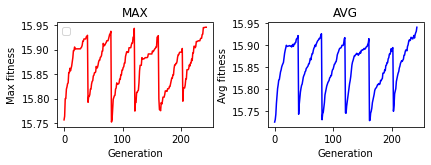

Best solution of best individual: [[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0

In [89]:
population_size=20
prob_cross = 0.6
prob_mutation = 0.2
genererations = 10

averege_Fitness_all_gen=list()
maxFitness_all_gen=list()
Howmanygenerations =list()
BestFitnessForAllGens =list()
BestFitnessPerGens =list()
BestFitness = list()
genbest=list()
best={}
final_Bestfitness=list()

def main(population_size,prob_cross,prob_mutation):
  
 

  for i in range(10): # iterations
      print("%d Prospatheia "%(i))
       # dimiourgia plithismou
      pop = toolbox.population(n=population_size)

    #Evaluation fitness function 
      fitnesses = list(map(toolbox.evaluate, pop))
      for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
  
    # CXPB pithanotita zeugaromatos
    # MUTPB pithanotita metalakseis
      CXPB, MUTPB = prob_cross, prob_mutation

      #Statistics
      stats = tools.Statistics(key=lambda ind:ind.fitness.values)

	# Extracting all the fitnesses of (epistrefi to fitness)
      fits = [ind.fitness.values[0] for ind in pop]
	
    # Variable keeping track of the number of generations
      g = 0
    #upologismos kritiriwn 
      check_critiria =0
      #Save to fitness pou exoume
      previous_fit=max(fits)
      #best fitness apo oles tis genies
      bestfitness=0
  # Begin the evolution
      while check_critiria < 1 and g < 40:

    # A new generation
        g = g + 1
        print("-- Generation %i --" % g) 

    # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring)) 

    # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values


    # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

    # Replace the old population by the offspring
        pop[:] = offspring  


    # Gather all the fitnesses in one list and print the stats
        fitness = [ind.fitness.values[0] for ind in pop]

        

#------------------------KRITIRIA GIA NA SUNEXISEI H EKTELESI TOU GENERATION-----------------------------------------
        #Ean papsei na veltiwnete to fitness h to max fit pou vriskw mikrotero apo to prohgoumeno pou eixa
        if max(fitness) < (1.000*previous_fit) or previous_fit == max(fitness):
            check_critiria += 1
        else:
            check_critiria = 0

        previous_fit =max(fits)
#------------------------------------EKTELESI GIA KATHE GENIA-----------------------------------------------------------------------------
        #GIA KATHE GENERATION:
        maxFitness_per_gen=(max(fitness))
        average_fitness_per_gen = ((sum(fitness)/len(pop)))
        print(" Max fitness:%s && Average fitness:%s" %((maxFitness_per_gen),(average_fitness_per_gen)))
    

#--------------------------------------TO MEGALITERO KATHE GENIAS KAI TO ANTISTOIXO AVG ----------------------------------------------------------------------
        maxFitness_all_gen.append(maxFitness_per_gen)
        averege_Fitness_all_gen.append(average_fitness_per_gen)

        #TWRA THELOUME APO OLES TIS GENIES NA KRATISOUME MONO ENA, TO MEGALITERO 
        final_Bestfitness.append(max(maxFitness_all_gen))

#----------------------------------------------SUNOLIKES GENIES EKTELESIS---------------------------------------------------------------------------------
        Howmanygenerations.append(g)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
        #PREPEI NA VROUME TO BEST FITNESS 
        best_fitness =max(fitness)
        if best_fitness > bestfitness:
            bestfitness = best_fitness
            Bestindex =pop[fitness.index(best_fitness)]
        BestFitnessPerGens.append(best_fitness)

         
        #Vale stin lista mono to megalutero stoixio pou vrikes
        BestFitnessForAllGens.append(max(BestFitnessPerGens))
#################################################################################
       

################################################################################
      
        #length = len(pop)
        #mean = sum(fits) / length
        #sum2 = sum(x*x for x in fits)
        #std = abs(sum2 / length - mean**2)**0.5

        #print("  Min %s" % min(fits))
        #print("  Max %s" % max(fits))
        #print("  Avg %s" % mean)
        #print("  Std %s" % std)
  #best_ind = tools.selBest(pop,1)
  #print("sfsffsfs:",(best_ind))

  best_ind =tools.selBest(pop,1)
  print("<------------------------- APOTELESMATA ------------------------>")
  print("Avg for generations:",mean(Howmanygenerations))
  print("Best fitness of best individual:",np.amax(max(BestFitnessForAllGens)))
  print("Avg fitness of best individual:",np.mean(BestFitnessForAllGens))


  plt.figure(0)
  plt.subplot(2, 2, 1)
  plt.plot(BestFitnessPerGens,color='red')
  plt.title("MAX")
  plt.ylabel("Max fitness")
  plt.xlabel("Generation")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.plot(averege_Fitness_all_gen,color="blue")
  plt.title("AVG")
  plt.ylabel("Avg fitness")
  plt.xlabel("Generation")
  plt.tight_layout()
  plt.show()

  print("Best solution of best individual:",(best_ind))
  
  #print("Best solution",(BestFitnessForAllGens))
# Run GA Algorithm
main(population_size,prob_cross,prob_mutation)  
